## Degradation effect

Figure 4a in the revised version, varying $\sigma$ in the equation between 0 and 0.5 

$\frac{d a_i}{d t} = r_i a_i \left(1 - \frac{\sum_i^n a_i}{K} \right) + \lambda_i a_{i-1} - \lambda_{i+1} a_i - \sigma a_i f( I ) \quad i=1,2,\ldots, n$

$\frac{d I}{d t} = \sum_i^n a_i \theta_i - I \left( \sum_i^n \mu_i a_i \right) - \xi I + \gamma_I$

* $a_i$ : vector of age masses (per m $^3$)
* $I$ : inhibitor content, not limited to units - probably need to be rescaled to some saturation value?
* $r_i$ : growth rate vector (per age)
* $K$ : saturation (logistic growth model, we decided about 10 kg/m$^3$)
* $\lambda$ : vector of 1/time resolution, e.g. 1 (for day by day age). All $\lambda_i$ are equal
* $\sigma$ : rate of algae degradation /destruction when there are no inhibitors
* $\theta_i$ : rate of creation of inhibitor, shall be large for young and negligible for older algae
* $\mu_i$ : rate of uptake of inhibitor from the surrounding, probably also better for young
* $\xi$ : rate of leakage, destruction of inhibitor, losses.
* $\gamma_I$ :   is the nutrient supply flux in the units of inhibitor concentration



In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

from algae_population import *

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
sigmas = [0., 0.1, 0.2, 0.3, 0.4, 0.5]

data = []

for sig in sigmas:
    def sigma(t):
        return sig

    # print(sigma(0))

    solutions = []
    # simulation with mixture of old:
    for s in scenarios.items():
        
        a = scenario_to_age_distribution(s)

        print(s)


        # if only young:
        # a = np.zeros((n_days))
        # a[0] = 0.5 # all young the units are actually kg/m^3 as it's normalized by K

        # simulation with a uniform mix of all ages, but in total should be 0.1K
        # a = np.ones((n_days))*K/n_days/100


        # initial inhibitor
        I = 0.0

        # this our vector of state variables: all a_i, i= 0...N-1
        # and I 
        # so it's N + 1 equations
        y = np.hstack((a,I))

        # this means that we stop the ODE when sporulation crosses zero from above
        sporulation.terminal = True
        sporulation.direction = -1

        # methods = ['RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA']
        methods = ['RK45']

        print(sigma(0))

        for method in methods:
            sol = solve_ivp(evolution, [t0, tend], y, args=(K, lamda, xi, gammai, theta, mu, dilution, tau, sigma),
            method=method, dense_output=True, events=sporulation)
            sol['s'] = s

        solutions.append(sol) 
        # other options are RK45, RK23, DOP853, Radau, BDF, LSODA
        # plot_results(sol, tend=240, K=10)

    data.append(solutions)

('100/0', [(0, 0.2)])
0.0
('90/10', [(0, 0.18000000000000002), (120, 0.020000000000000004)])
0.0
('80/20', [(0, 0.16000000000000003), (120, 0.04000000000000001)])
0.0
('70/30', [(0, 0.13999999999999999), (120, 0.06)])
0.0
('60/40', [(0, 0.12), (120, 0.08000000000000002)])
0.0
('50/50', [(0, 0.1), (120, 0.1)])
0.0
('40/60', [(0, 0.08000000000000002), (120, 0.12)])
0.0
('30/70', [(0, 0.06), (120, 0.13999999999999999)])
0.0
('20/80', [(0, 0.04000000000000001), (120, 0.16000000000000003)])
0.0
('10/90', [(0, 0.020000000000000004), (120, 0.18000000000000002)])
0.0
('0/100', [(120, 0.2)])
0.0
('100/0', [(0, 0.2)])
0.1
('90/10', [(0, 0.18000000000000002), (120, 0.020000000000000004)])
0.1
('80/20', [(0, 0.16000000000000003), (120, 0.04000000000000001)])
0.1
('70/30', [(0, 0.13999999999999999), (120, 0.06)])
0.1
('60/40', [(0, 0.12), (120, 0.08000000000000002)])
0.1
('50/50', [(0, 0.1), (120, 0.1)])
0.1
('40/60', [(0, 0.08000000000000002), (120, 0.12)])
0.1
('30/70', [(0, 0.06), (120, 0.139999

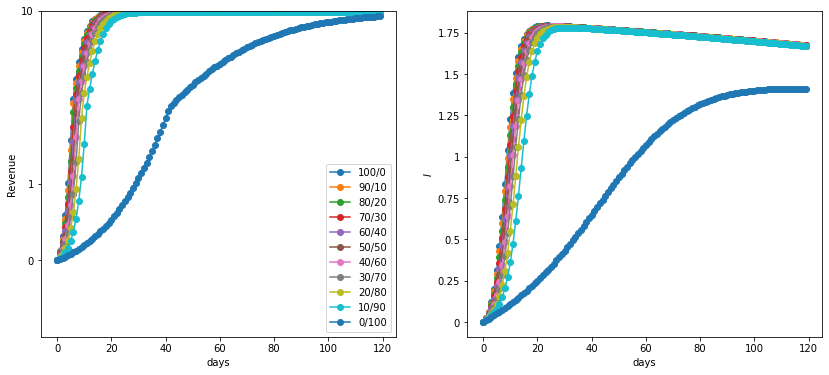

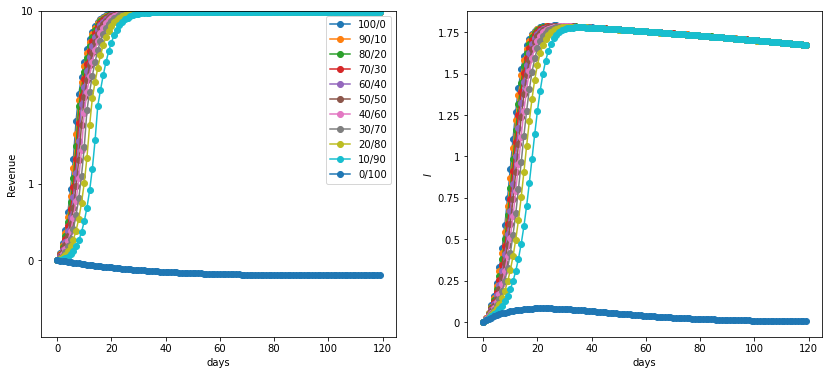

sporulation event at [116.205]


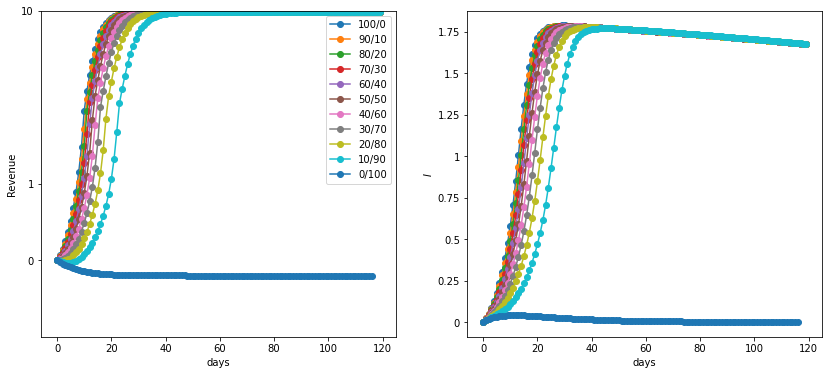

sporulation event at [103.659]


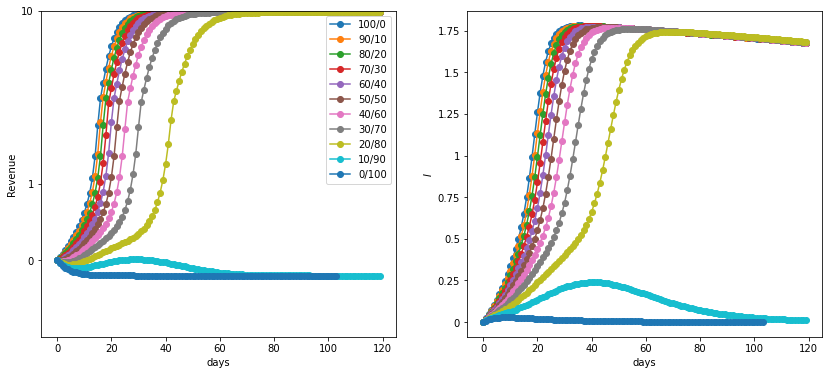

sporulation event at [112.422]
sporulation event at [111.909]
sporulation event at [110.412]
sporulation event at [110.284]
sporulation event at [109.939]
sporulation event at [109.849]
sporulation event at [109.659]
sporulation event at [108.109]
sporulation event at [95.098]


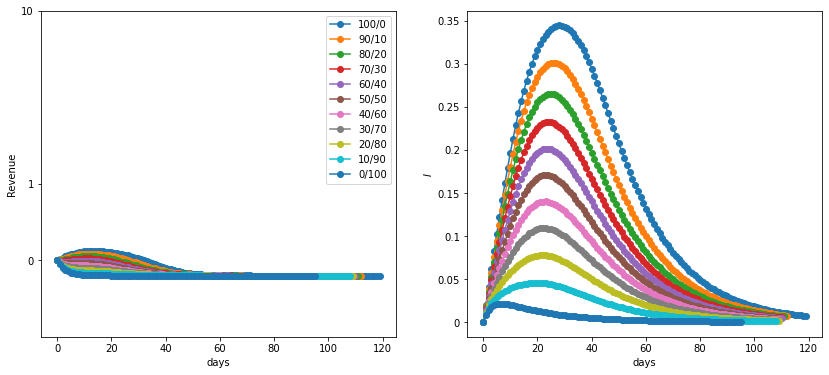

sporulation event at [100.603]
sporulation event at [100.429]
sporulation event at [100.313]
sporulation event at [100.085]
sporulation event at [100.003]
sporulation event at [99.783]
sporulation event at [98.517]
sporulation event at [89.793]


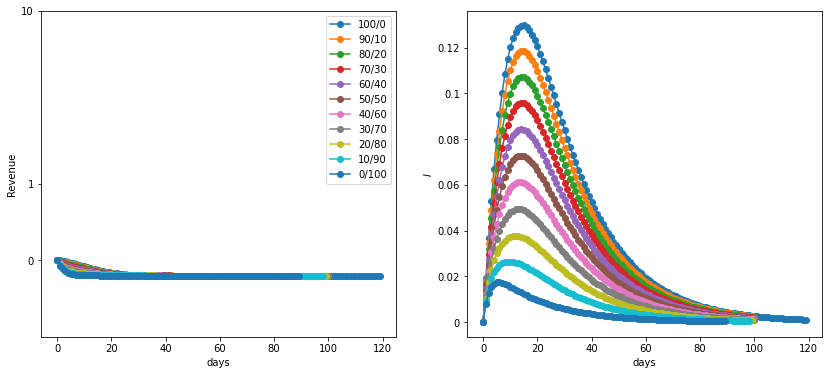

In [3]:
for d in data:
    plot_all_results(d,K=10,tend=120)

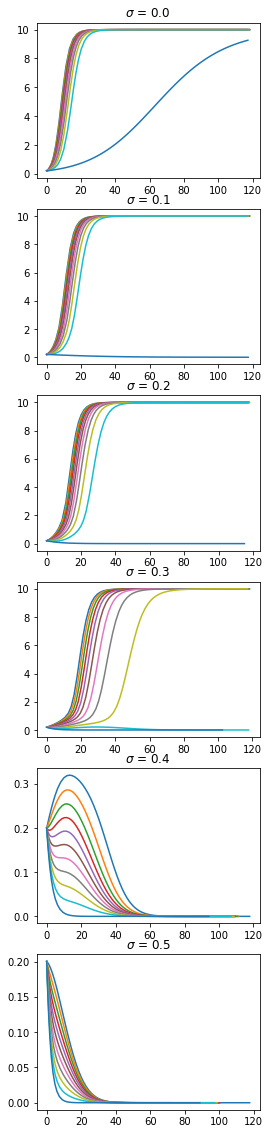

In [4]:

fig, ax = plt.subplots(len(sigmas),1,figsize=(4,20))
for j in range(len(sigmas)):
    for i in range(len(scenarios)):
        # print(j,i)
        # print(data[j][i]['s'][0])
        ind = np.where(data[j][i].t <= 120)[0][-1]      
        ax[j].plot(data[j][i].t[:ind], data[j][i].y[:-1, :ind].sum(axis=0).T, label=data[j][i]['s'][0])
        ax[j].set_title(f'$\sigma$ = {sigmas[j]}')
plt.show()

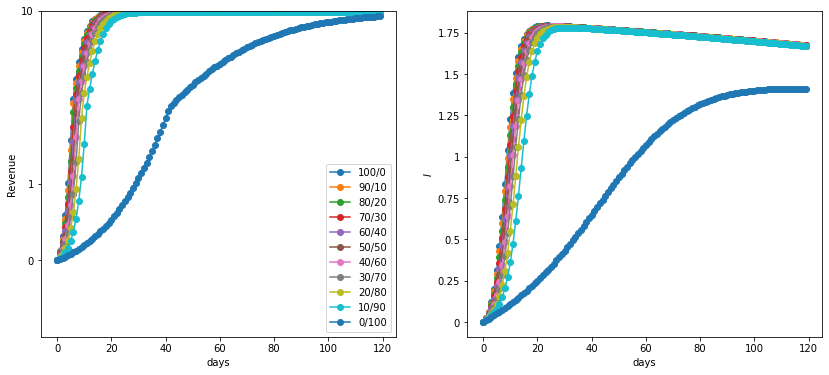

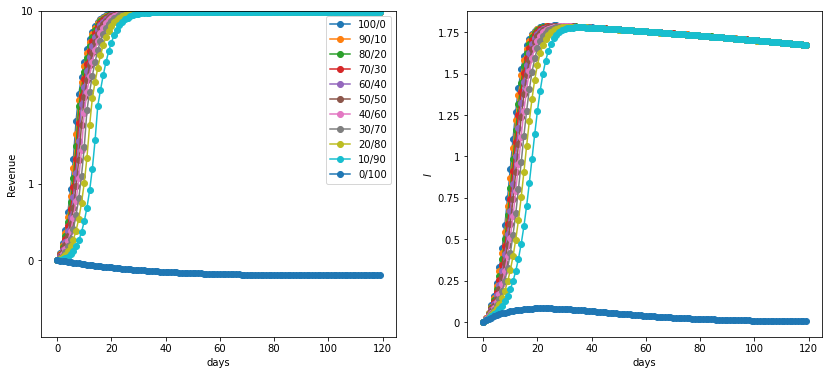

sporulation event at [116.205]


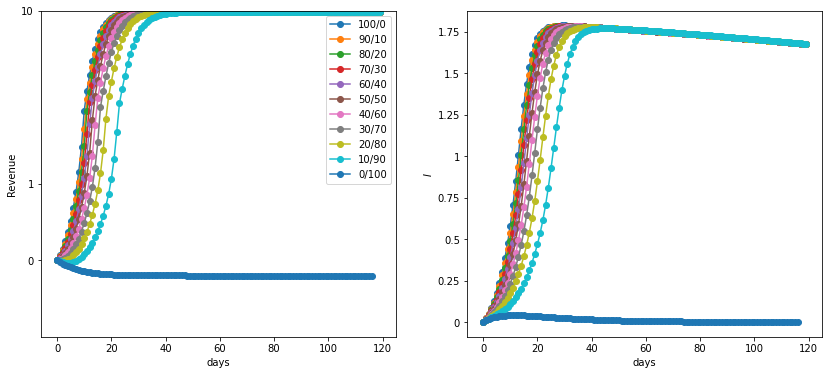

sporulation event at [103.659]


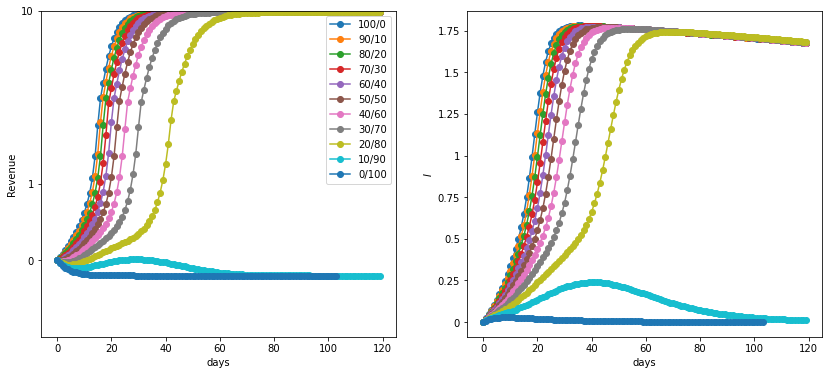

sporulation event at [112.422]
sporulation event at [111.909]
sporulation event at [110.412]
sporulation event at [110.284]
sporulation event at [109.939]
sporulation event at [109.849]
sporulation event at [109.659]
sporulation event at [108.109]
sporulation event at [95.098]


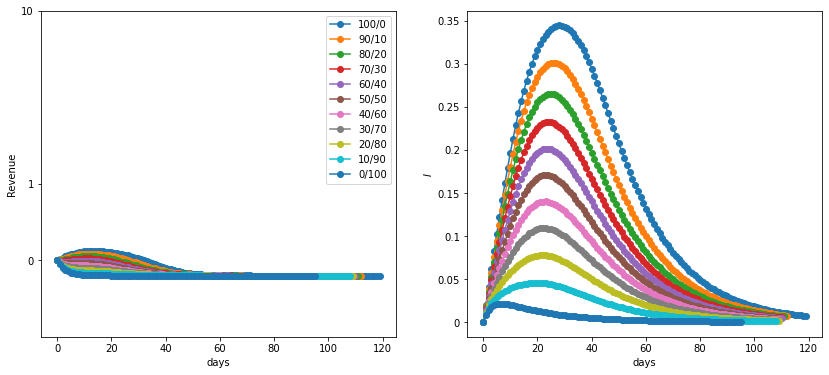

sporulation event at [100.603]
sporulation event at [100.429]
sporulation event at [100.313]
sporulation event at [100.085]
sporulation event at [100.003]
sporulation event at [99.783]
sporulation event at [98.517]
sporulation event at [89.793]


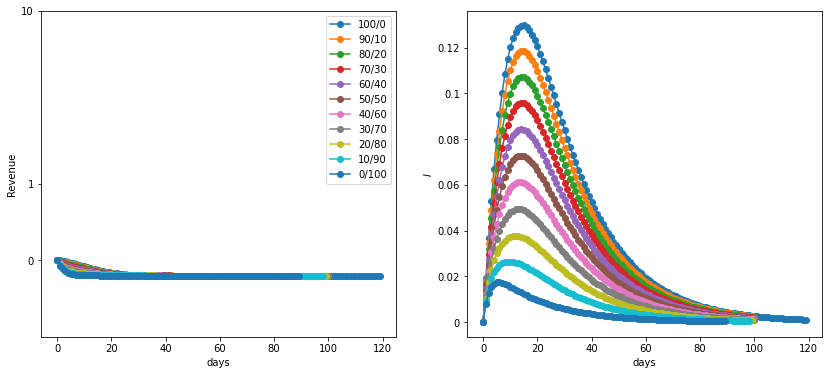

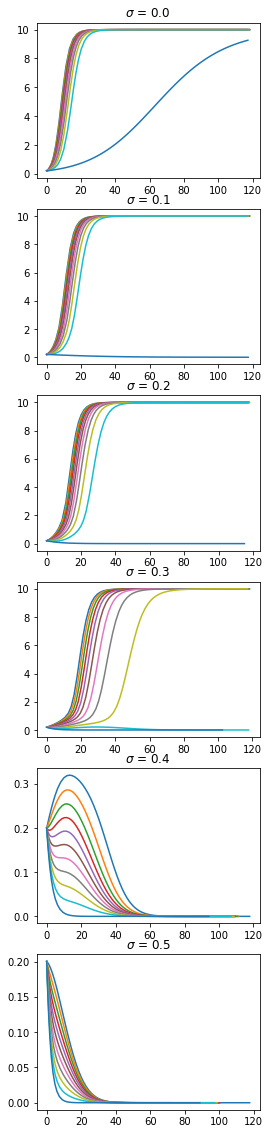

In [5]:
for d in data:
    plot_all_results(d,K=10,tend=120)

fig, ax = plt.subplots(len(sigmas),1,figsize=(4,20))
for j in range(len(sigmas)):
    for i in range(len(scenarios)):
        # print(j,i)
        # print(data[j][i]['s'][0])
        ind = np.where(data[j][i].t <= 120)[0][-1]      
        ax[j].plot(data[j][i].t[:ind], data[j][i].y[:-1, :ind].sum(axis=0).T, label=data[j][i]['s'][0])
        ax[j].set_title(f'$\sigma$ = {sigmas[j]}')
plt.show()

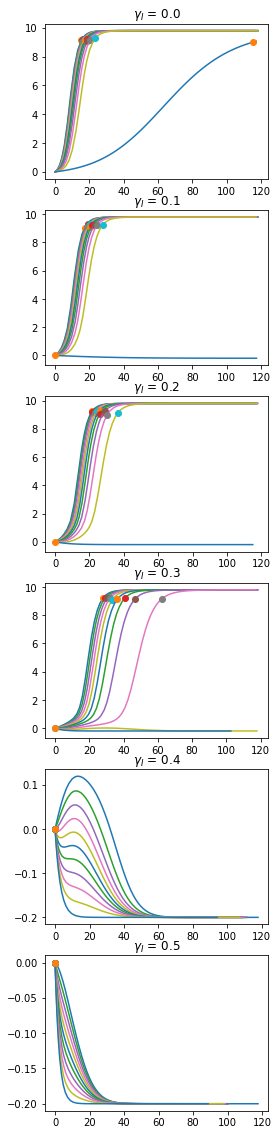

In [6]:
# Estimate settling time

settling_time = np.zeros((len(sigmas),len(scenarios)))
fig, ax = plt.subplots(len(sigmas),1,figsize=(4,20))
for j in range(len(sigmas)):
    for i in range(len(scenarios)):
        # print(j,i)
        # print(data[j][i]['s'][0])
        ind = np.where(data[j][i].t <= 120)[0][-1]
        biomass = data[j][i].y[:-1, :ind].sum(axis=0).T
        revenue = biomass - 0.2
        settling = np.argmax(revenue >= 0.9*K)
        settling_time[j][i] =  settling
        ax[j].plot(data[j][i].t[:ind], revenue, label=data[j][i]['s'][0])
        ax[j].plot(data[j][i].t[settling], revenue[settling],'o')
        ax[j].set_title(f'$\gamma_I$ = {sigmas[j]}')
plt.show()

In [7]:
import pickle

with open('figure3a.p','wb') as f:
    pickle.dump(sigmas, f)
    pickle.dump(data, f)
    pickle.dump(settling_time, f)
    